In [67]:
### import 
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

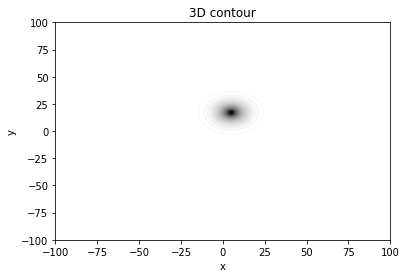

In [69]:
## create a stink somewhere as an exponential peak on a 2d grid

## stink parameters
strength = 10
radius = 5
position = np.array([5, 17])
## meshgrid
(nx ,ny) = (1000,1000)
x = np.linspace(-100, 100, nx)
y = np.linspace(-100, 100, ny)
X, Y = np.meshgrid(x,y)

testStink = strength*np.exp( (-1/radius) * (np.sqrt((X-position[0])**2 + (Y-position[1])**2)))

fig = plt.figure()
ax = plt.axes()#projection='3d')
ax.contour(X, Y, testStink, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()


In [86]:
## have a lamp exist somewhere else
lampPosition = np.array([0,0])
lampSize = np.array([9,3])

points = [[2, 4], [2, 8], [4, 6], [6, 8]]
line = plt.Polygon(points, closed=None, fill=None, edgecolor='r')
### create the shape of a standard lamp
###      *---*
###     /     \
###    /       \
###       ||
###       ||
###       ||
###     =====

In [71]:
### Create lamp dimensions
def lampPolygon(length, width):
    ###                  _
    ###       *---*      |
    ###      /c/2  \     c
    ###     /       \    |
    ###    /    --a--\   -
    ###       ||
    ###       ||  e
    ###       ||
    ###     ===== b/2
    shadeHeight = .4 # how much of the shaft is coverd by the shade
    sliver = length/50
    a = width/2
    c = shadeHeight*length
    e = (1-shadeHeight)*length
    verticies = np.array([[a,0], [c/2, c], [-c/2, c], [-a,0], [-sliver, 0], [-sliver, -e], [-c/4, -e], [-c/4, -e-sliver], [c/4, -e-sliver], [c/4, -e], [sliver, -e], [sliver,0]])
    return verticies 

def rotateLamp(position, velocity, verticies):
    ### get unit vector for velocity to obtain the direction
    ### create rotation matrix matrix 
    ### apply transformation to verticies
    ### return transformed verticies
    magV = np.linalg.norm(velocity)
    angle = np.arccos(velocity[0]/magV) # dotproduct with x-axis picks x component
    print(angle)
    print(np.cos(angle))
    
    rotationMatrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    print('rotation matrix created')
    rotatedVerts = np.matmul(rotationMatrix, np.transpose(verticies))
    print('lamp rotated')
    newVerts = np.add(rotatedVerts, position.reshape(2,1))
    print('lamp shifted')
    return np.transpose(newVerts)
    


In [81]:
position = np.array([1,2])
velocity = np.array([4,-3])
length = 9;
width = 5;

    

In [72]:
verticies = lampPolygon(length, width)




In [83]:

newVerticies = rotateLamp(position, velocity, verticies)
print((newVerticies))

0.6435011087932843
0.8
rotation matrix created
lamp rotated
lamp shifted
[[ 3.     3.5  ]
 [ 0.28   5.96 ]
 [-2.6    3.8  ]
 [-1.     0.5  ]
 [ 0.856  1.892]
 [ 4.096 -2.428]
 [ 3.52  -2.86 ]
 [ 3.628 -3.004]
 [ 5.068 -1.924]
 [ 4.96  -1.78 ]
 [ 4.384 -2.212]
 [ 1.144  2.108]]


In [84]:
print(verticies)

[[ 2.5   0.  ]
 [ 1.8   3.6 ]
 [-1.8   3.6 ]
 [-2.5   0.  ]
 [-0.18  0.  ]
 [-0.18 -5.4 ]
 [-0.9  -5.4 ]
 [-0.9  -5.58]
 [ 0.9  -5.58]
 [ 0.9  -5.4 ]
 [ 0.18 -5.4 ]
 [ 0.18  0.  ]]


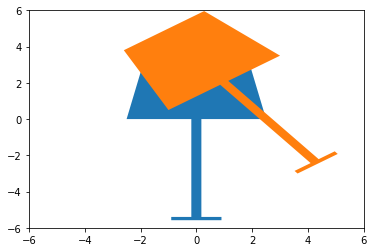

In [89]:

verticies = lampPolygon(length, width)
plt.xlim(-6, 6)
plt.ylim(-6,6 )

plt.fill(verticies[:,0], verticies[:,1])

plt.fill(newVerticies[:,0], newVerticies[:,1])


In [80]:
position

array([ 5, 17])